# Session 6: data collection and visualization
- matplotlib
- pandas
- pandas_datareader

## Data science

- [wikipedia:](https://en.wikipedia.org/wiki/Data_science)
Data science is an inter-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from many structural and unstructured data. Data science is related to data mining, deep learning and big data.

- data collection/mining
  - structured
  - unstructured
- visualization
  - matplotlib
- analysis
  - Linear regression
  - model
- reflection
  
  
### project lists
- stocks
- online classes and quality
- retail
- crime
  

## Sample project: COVID-19 cases

In [3]:
# covid data
# filename: us.csv
# source: https://github.com/nytimes/covid-19-data

import pandas as pd
df=pd.read_csv('../sample-code/data/us.csv',index_col=['date'])
print(df.head())

            cases  deaths
date                     
2020-01-21      1       0
2020-01-22      1       0
2020-01-23      1       0
2020-01-24      2       0
2020-01-25      3       0


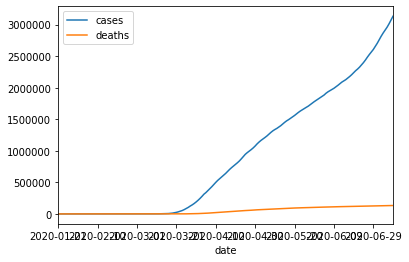

In [4]:
df.plot()

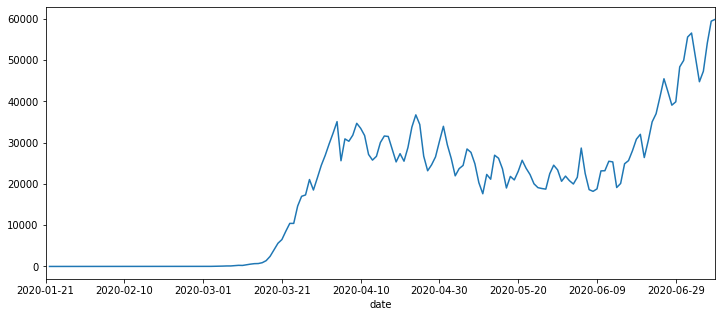

In [8]:
#fig1, ax1 = plt.subplots(figsize=(10,5))
df["cases"].diff().plot(figsize=(12,5))

How about california? Riverside?

## stocks

- filename: dow jones: data-EKHTG.csv
- filename: nasdaq: data-APZBu.csv

- source:
https://www.marketplace.org/2020/05/01/how-the-markets-are-reacting-to-covid-19/



In [17]:
data=pd.read_csv('../sample-code/data/data-EKHTG.csv',index_col=['Date'])
data.head(10)

,Close
Date,
5/2/2020,23749.76
5/1/2020,23723.69
4/30/2020,24345.72
4/29/2020,24633.86
4/28/2020,24101.55
4/27/2020,24133.78
4/24/2020,23775.27
4/23/2020,23515.26
4/22/2020,23475.82


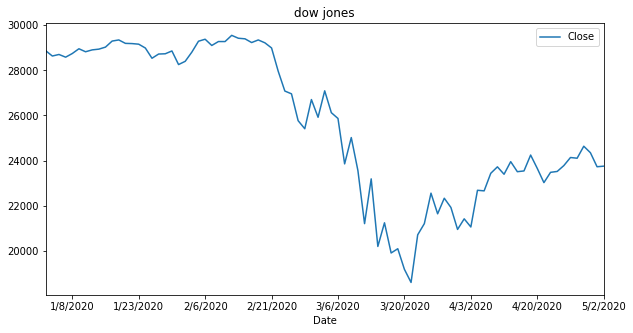

In [14]:
data.plot(title='dow jones', figsize=(10,5))
plt.gca().invert_xaxis()
#plt.show()

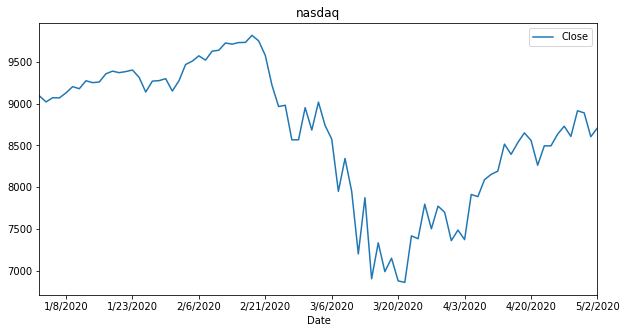

In [17]:
data=pd.read_csv('../sample-code/data/data-APZBu.csv',index_col=['Date'])
data.plot(title='nasdaq', figsize=(10,5))
plt.gca().invert_xaxis()

### Yahoo Finance

In [19]:
%pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [1]:
# pip install pandas_datareader
# conda install pandas_datareader
#from pandas.util.testing import assert_frame_equal
import pandas_datareader as pdr

In [2]:
alibaba = pdr.get_data_yahoo("BABA")
#alibaba.head()
msft = pdr.get_data_yahoo("MSFT")
#msft.head()
zoom = pdr.get_data_yahoo("ZM")

                 High        Low       Open      Close    Volume  Adj Close
Date                                                                       
2015-07-27  81.699997  79.680000  80.849998  81.400002  12185700  81.400002
2015-07-28  80.800003  79.250000  80.669998  80.559998  12122800  80.559998
2015-07-29  81.369003  80.010002  80.980003  80.260002   7177100  80.260002
2015-07-30  80.639999  79.449997  80.110001  79.959999   6934700  79.959999
2015-07-31  79.904999  78.199997  79.849998  78.339996  12687000  78.339996


(737425.0, 737607.0)

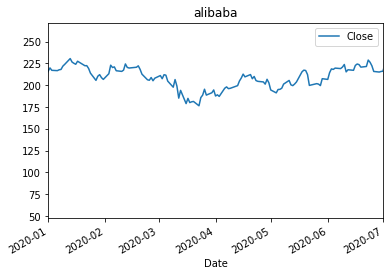

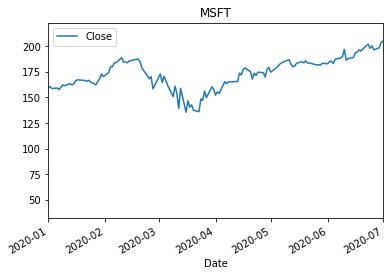

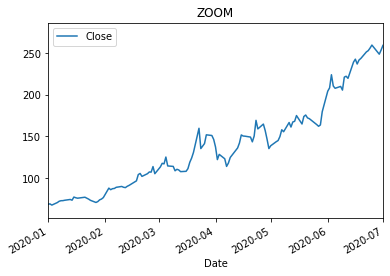

In [7]:
print(alibaba.head())
alibaba.plot(title="alibaba", y = "Close")
plt.xlim('2020-01-01','2020-07-01')
msft.plot(title="MSFT", y = 'Close')
plt.xlim('2020-01-01','2020-07-01')
zoom.plot(title="ZOOM",y='Close')
plt.xlim('2020-01-01','2020-07-01')


## retail companies

In [ ]:
# analyze data of a list of retail companys (or high-tech companies), 
# and see how it responses to COVID

retail_names=['costco','amazon','walmart','']
retail_codes=['COST']

# use a for loop to get all the data
# use a for loop for plot all the data



## twitter data
- filename: 2020-07-06_top1000bigrams.csv

In [12]:
#tw = pd.read_csv('data/2020-07-06_top1000bigrams.csv')
tw = pd.read_csv('../sample-code/data/covid-term/2020-05-03_top1000terms.csv', header=None,names=['term','frequency'])
#tw.set_index('term',inplace=True)
a=tw[tw['term']=='covid']
b=a.set_index(pd.Index(range(a.shape[0])))
b.loc[0,'frequency']
tw.head(30)

,term,frequency
0,coronavirus,328383
1,covid,203800
2,19,193076
3,covid19,167520
4,NaN,62057
5,people,46485
6,amp,44220
7,cases,39189
8,new,38259
9,via,35970


In [14]:
import pandas as pd
from pandas import Series, DataFrame

#tw = pd.read_csv('data/2020-07-06_top1000bigrams.csv')
#tw.head(20)

# read all files
t_range=pd.date_range('2020-03-22','2020-07-06')
#t_range
keywords=['covid','coronavirus','trump','google','china','wuhan','virus']
keywords=['trump','google','china','wuhan','virus','doctor','cuomo']

df = DataFrame(index=t_range)
folder='../sample-code/data/covid-term/'

for d in t_range:
    filename=folder + str(d)[:10] + '_top1000terms.csv'
    #print('filename --> ',filename)
    tw = pd.read_csv(filename, header=None, names=['term','frequency'])
    
    for key in keywords:
        tw_short=tw[tw['term']==key]
        if tw_short.shape[0]==0:
            f=0
        else:
            tw_short2=tw_short.set_index(pd.Index(range(tw_short.shape[0])))        
            f=tw_short2.loc[0,'frequency']
        df.loc[d,key]=f
    

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

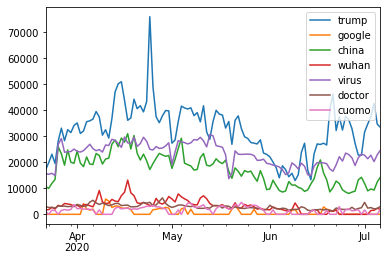

In [16]:
df.plot()

### More to do
- check the frequency with weekdays and weekends
- check degree of anxiety from the keywords, and relate to daily new cases